# DLW Practical 1: MNIST
# From linear to non-linear models with MNIST

**Introduction**

In this practical we will experiment further with linear and non-linear models using the MNIST dataset. MNIST consists of images of handwritten digits that we want to classify correctly.

**Learning objectives**:
* Implement a linear classifier on the MNIST image data set in Tensorflow. 
* Modify the code to to make the classifier non-linear by introducing a hidden non-linear layer. 

**What is expected of you:**
* Step through the code and make sure you understand each step. What test set accuracy do you get?
* Modify the code to make the classifier non-linear by adding a non-linear activation function layer in Tensorflow. What accuracy do you get now?

*Some parts of the code were adapted from the DL Indaba practicals.*

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


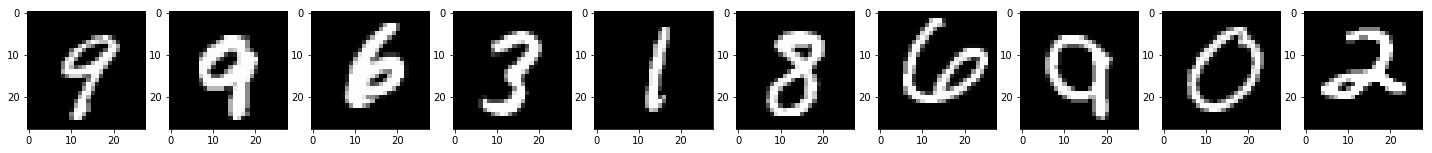

Epoch 1: cross-entropy-loss = 3.3787, training-accuracy = 49.756%
Epoch 2: cross-entropy-loss = 1.5172, training-accuracy = 71.575%
Epoch 3: cross-entropy-loss = 1.1803, training-accuracy = 76.969%
Epoch 4: cross-entropy-loss = 1.0151, training-accuracy = 79.656%
Epoch 5: cross-entropy-loss = 0.9132, training-accuracy = 81.485%
Epoch 6: cross-entropy-loss = 0.8421, training-accuracy = 82.607%
Epoch 7: cross-entropy-loss = 0.7876, training-accuracy = 83.415%
Epoch 8: cross-entropy-loss = 0.7458, training-accuracy = 84.116%
Epoch 9: cross-entropy-loss = 0.7120, training-accuracy = 84.582%
Epoch 10: cross-entropy-loss = 0.6838, training-accuracy = 85.080%
Epoch 11: cross-entropy-loss = 0.6594, training-accuracy = 85.438%
Epoch 12: cross-entropy-loss = 0.6389, training-accuracy = 85.802%
Epoch 13: cross-entropy-loss = 0.6206, training-accuracy = 86.104%
Epoch 14: cross-entropy-loss = 0.6041, training-accuracy = 86.387%
Epoch 15: cross-entropy-loss = 0.5902, training-accuracy = 86.664%
Epoc

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


def display_mnist_images(gens, num_images):
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'
    fig, axs = plt.subplots(1, num_images, figsize=(25, 3))
    for i in range(num_images):
        reshaped_img = (gens[i].reshape(28, 28) * 255).astype(np.uint8)
        axs.flat[i].imshow(reshaped_img)
    plt.show()


# download MNIST dataset #
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# visualize random MNIST images #
batch_xs, batch_ys = mnist.train.next_batch(10)
list_of_images = np.split(batch_xs, 10)
display_mnist_images(list_of_images, 10)

x_dim, train_examples, n_classes = mnist.train.images.shape[1], mnist.train.num_examples, mnist.train.labels.shape[1]

######################################
# define the model (build the graph) #
######################################

x = tf.placeholder(tf.float32, [None, x_dim])
W = tf.Variable(tf.random_normal([x_dim, n_classes]))
b = tf.Variable(tf.ones([n_classes]))
y = tf.placeholder(tf.float32, [None, n_classes])
y_ = tf.add(tf.matmul(x, W), b)
prob = tf.nn.softmax(y_)

########################
# define loss function #
########################

cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_, labels=y))

learning_rate = 0.01

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

###########################
# define model evaluation #
###########################

actual_class, predicted_class = tf.argmax(y, 1), tf.argmax(prob, 1)
correct_prediction = tf.cast(tf.equal(predicted_class, actual_class), tf.float32)
classification_accuracy = tf.reduce_mean(correct_prediction)

#########################
# define training cycle #
#########################

num_epochs = 50
batch_size = 20

# initializing the variables before starting the session #
init = tf.global_variables_initializer()

# launch the graph in a session (use the session as a context manager) #
with tf.Session() as sess:
    # run session #
    sess.run(init)
    # start main training cycle #
    for epoch in range(num_epochs):
        avg_cost = 0.
        avg_acc = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # loop over all batches #
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # run optimization op (backprop), cost op and accuracy op (to get training losses) #
            _, c, a = sess.run([train_step, cross_entropy_loss, classification_accuracy], feed_dict={x: batch_x, y: batch_y})
            # compute avg training loss and avg training accuracy #
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        # display logs per epoch step #
        if epoch % 1 == 0:
            print("Epoch {}: cross-entropy-loss = {:.4f}, training-accuracy = {:.3f}%".format(epoch + 1, avg_cost, avg_acc * 100))
    print("Optimization Finished!")
    # calculate test set accuracy #
    test_accuracy = classification_accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
    print("Accuracy on test set = {:.3f}%".format(test_accuracy * 100))